## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
files_path = "/Users/hramirez/GitHub/Renewable_Energy/files/"

Meteo = pd.read_csv(files_path + "Meteo.csv", parse_dates=[['Date', 'Time']])
datos_solar = pd.read_excel(files_path + "Datos_solar_y_demanda_residencial.xlsx")

In [3]:
Meteo.head()

,Date_Time,Temperature,Dew Point,Humidity,Wind,Speed,Gust,Pressure,Precip. Rate.,Precip. Accum.,UV,Solar
0,2015-01-01 01:01:00,31.5 F,23.2 F,71 %,West,0.0 mph,2.2 mph,29.87 in,0.00 in,0.00 in,NaN,w/m²
1,2015-01-01 01:08:00,31.2 F,22.9 F,71 %,West,0.0 mph,1.2 mph,29.87 in,0.00 in,0.00 in,NaN,w/m²
2,2015-01-01 01:11:00,30.6 F,22.3 F,71 %,West,0.0 mph,1.6 mph,29.87 in,0.00 in,0.00 in,NaN,w/m²
3,2015-01-01 01:16:00,30.4 F,22.1 F,71 %,WNW,0.0 mph,1.6 mph,29.86 in,0.00 in,0.00 in,NaN,w/m²
4,2015-01-01 01:21:00,30.0 F,21.8 F,71 %,NW,0.0 mph,1.6 mph,29.87 in,0.00 in,0.00 in,NaN,w/m²


In [4]:
datos_solar.head()

,Date,PV Tejado (W),PV2 Parque (W),Demanda (W)
0,2015-01-01 00:00:00,0,0,146
1,2015-01-01 01:00:00,0,0,262
2,2015-01-01 02:00:00,0,0,308
3,2015-01-01 03:00:00,0,0,954
4,2015-01-01 04:00:00,0,0,1424


In [5]:
def round_to_5min(t):
    delta = datetime.timedelta(minutes=t.minute % 5,
                               seconds=t.second,
                               microseconds=t.microsecond)
    t -= delta
    if delta > datetime.timedelta(0):
        t += datetime.timedelta(minutes=5)
    return t


Meteo['DateRound'] = Meteo["Date_Time"].dt.round("5min")
datos_solar['DateRound'] = datos_solar['Date'].dt.round("5min")

Meteo['Hour'] = Meteo['DateRound'].dt.hour
Meteo['Day'] = Meteo['DateRound'].dt.dayofyear

In [6]:
Meteo.head()

,Date_Time,Temperature,Dew Point,Humidity,Wind,Speed,Gust,Pressure,Precip. Rate.,Precip. Accum.,UV,Solar,DateRound,Hour,Day
0,2015-01-01 01:01:00,31.5 F,23.2 F,71 %,West,0.0 mph,2.2 mph,29.87 in,0.00 in,0.00 in,NaN,w/m²,2015-01-01 01:00:00,1,1
1,2015-01-01 01:08:00,31.2 F,22.9 F,71 %,West,0.0 mph,1.2 mph,29.87 in,0.00 in,0.00 in,NaN,w/m²,2015-01-01 01:10:00,1,1
2,2015-01-01 01:11:00,30.6 F,22.3 F,71 %,West,0.0 mph,1.6 mph,29.87 in,0.00 in,0.00 in,NaN,w/m²,2015-01-01 01:10:00,1,1
3,2015-01-01 01:16:00,30.4 F,22.1 F,71 %,WNW,0.0 mph,1.6 mph,29.86 in,0.00 in,0.00 in,NaN,w/m²,2015-01-01 01:15:00,1,1
4,2015-01-01 01:21:00,30.0 F,21.8 F,71 %,NW,0.0 mph,1.6 mph,29.87 in,0.00 in,0.00 in,NaN,w/m²,2015-01-01 01:20:00,1,1


In [7]:
datos_solar.head()

,Date,PV Tejado (W),PV2 Parque (W),Demanda (W),DateRound
0,2015-01-01 00:00:00,0,0,146,2015-01-01 00:00:00
1,2015-01-01 01:00:00,0,0,262,2015-01-01 01:00:00
2,2015-01-01 02:00:00,0,0,308,2015-01-01 02:00:00
3,2015-01-01 03:00:00,0,0,954,2015-01-01 03:00:00
4,2015-01-01 04:00:00,0,0,1424,2015-01-01 04:00:00


In [8]:
# Clean Meteo Frame from characters and columns that do not give information in this case: UV, Solar and Wind**

def clean(x):
    try:
        return x.str.replace(r"[a-zA-Z\%\/²]", '')
    except:
        return x


Meteo = Meteo.apply(lambda x: clean(x))
Meteo = Meteo.drop(columns=['UV', 'Solar', 'Wind'])
Meteo.head()

,Date_Time,Temperature,Dew Point,Humidity,Speed,Gust,Pressure,Precip. Rate.,Precip. Accum.,DateRound,Hour,Day
0,2015-01-01 01:01:00,31.5,23.2,71,0.0,2.2,29.87,0.00,0.00,2015-01-01 01:00:00,1,1
1,2015-01-01 01:08:00,31.2,22.9,71,0.0,1.2,29.87,0.00,0.00,2015-01-01 01:10:00,1,1
2,2015-01-01 01:11:00,30.6,22.3,71,0.0,1.6,29.87,0.00,0.00,2015-01-01 01:10:00,1,1
3,2015-01-01 01:16:00,30.4,22.1,71,0.0,1.6,29.86,0.00,0.00,2015-01-01 01:15:00,1,1
4,2015-01-01 01:21:00,30.0,21.8,71,0.0,1.6,29.87,0.00,0.00,2015-01-01 01:20:00,1,1


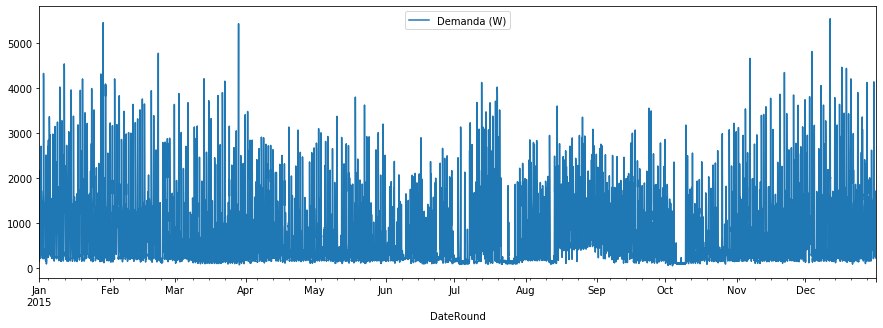

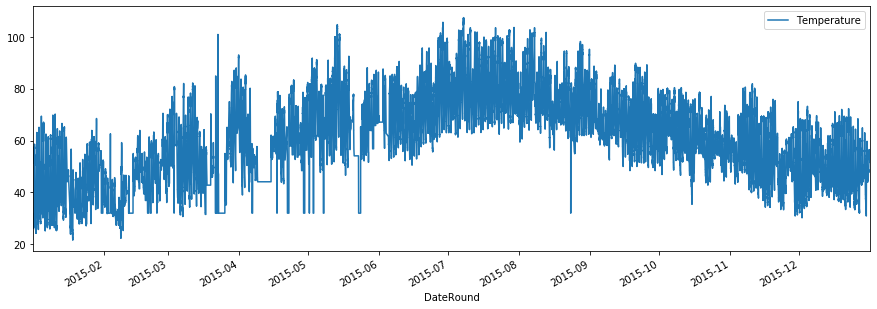

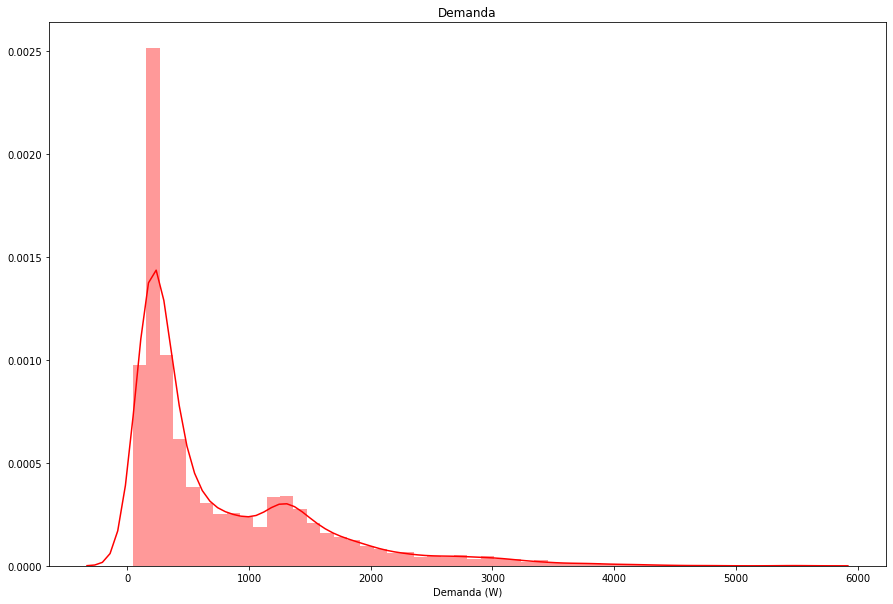

In [9]:
Meteo.Temperature = pd.to_numeric(Meteo.Temperature)
datos_solar.plot(x='DateRound', y='Demanda (W)', figsize=(15,5))
Meteo.plot(x='DateRound', y='Temperature', figsize=(15,5)) 

plt.figure(figsize=(15,10))
sns.distplot(datos_solar['Demanda (W)'], color='r').set_title('Demanda')
plt.show()

In [10]:
# Select relevant features for the final Meteo dataframe
# From solar dataframe selection only 'Demanda (W)'

list_features = ['Date_Time', 'Temperature', 'Dew Point', 'Humidity', 'Speed', 'Gust',
                 'Pressure', 'Precip. Rate.', 'Precip. Accum.', 'DateRound', 'Hour',
                 'Day']

Meteo_features = Meteo[list_features]
solar_demanda = datos_solar[['DateRound', 'Demanda (W)']]

# Merge both pandas based on datetime

df_demanda = pd.merge(Meteo_features, solar_demanda, on='DateRound')
# remove date from df
del df_demanda['DateRound']
df_demanda.head()

,Date_Time,Temperature,Dew Point,Humidity,Speed,Gust,Pressure,Precip. Rate.,Precip. Accum.,Hour,Day,Demanda (W)
0,2015-01-01 01:01:00,31.5,23.2,71,0.0,2.2,29.87,0.00,0.00,1,1,262
1,2015-01-01 02:01:00,28.6,21.7,75,0.0,1.6,29.88,0.00,0.00,2,1,308
2,2015-01-01 03:01:00,28.6,22.3,77,0.0,2.2,29.89,0.00,0.00,3,1,954
3,2015-01-01 04:01:00,26.6,20.4,77,0.0,1.6,29.91,0.00,0.00,4,1,1424
4,2015-01-01 05:01:00,27.3,21.7,79,0.0,0.7,29.92,0.00,0.00,5,1,1397


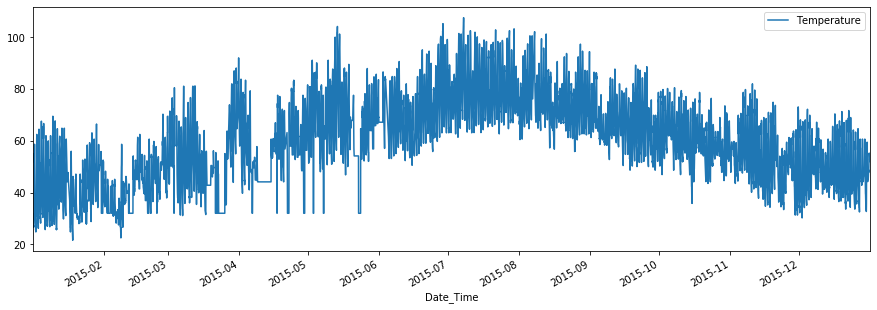

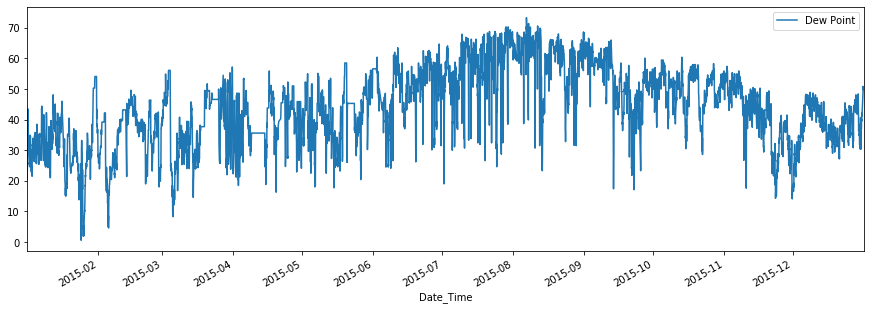

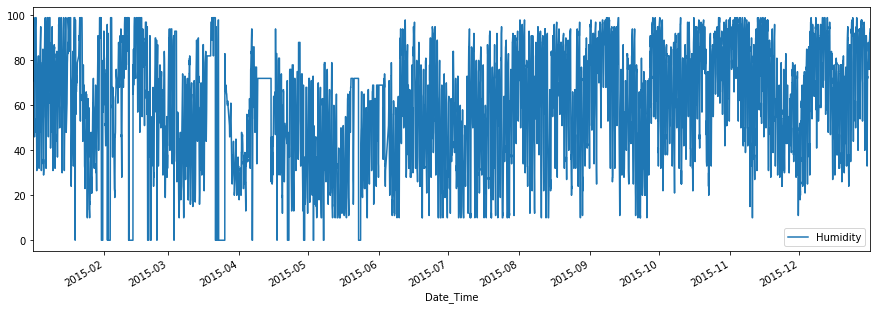

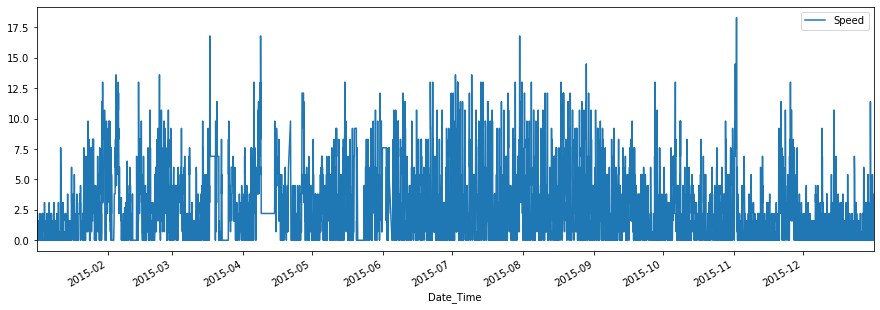

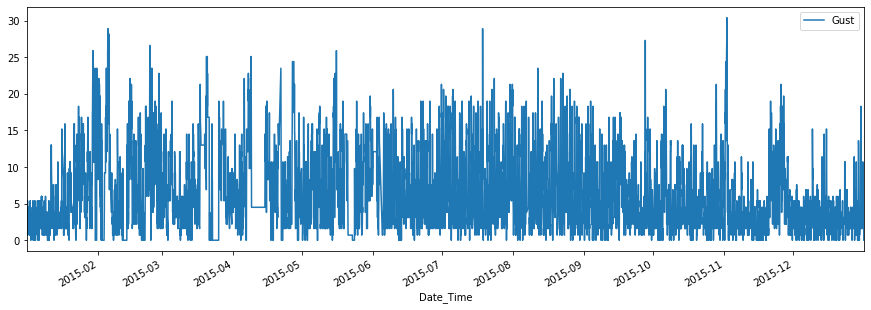

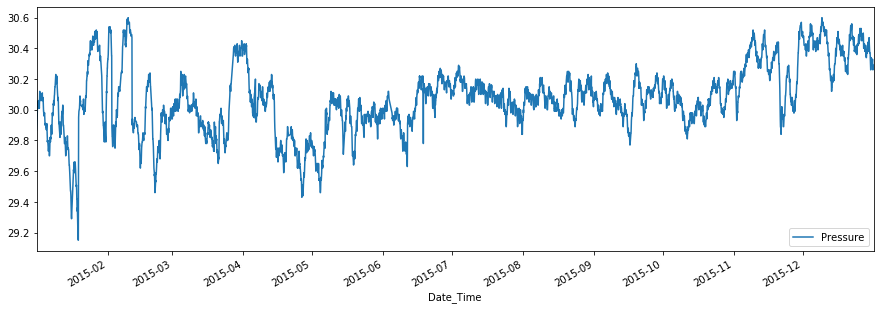

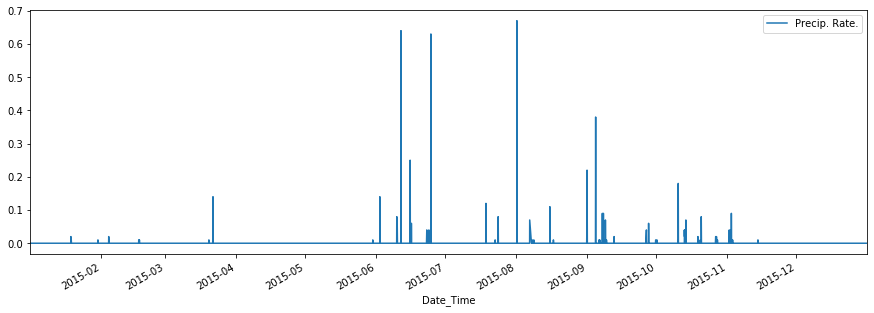

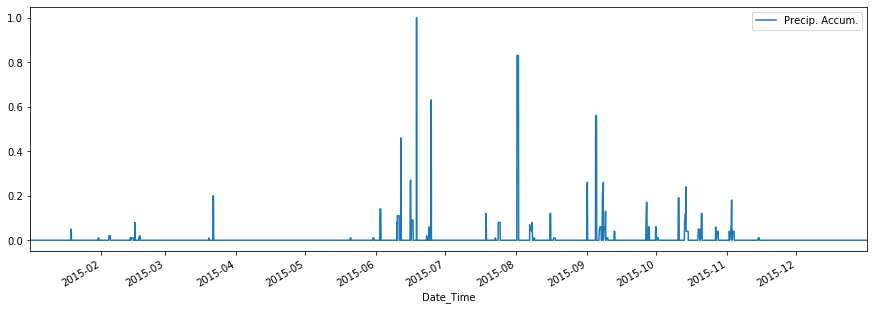

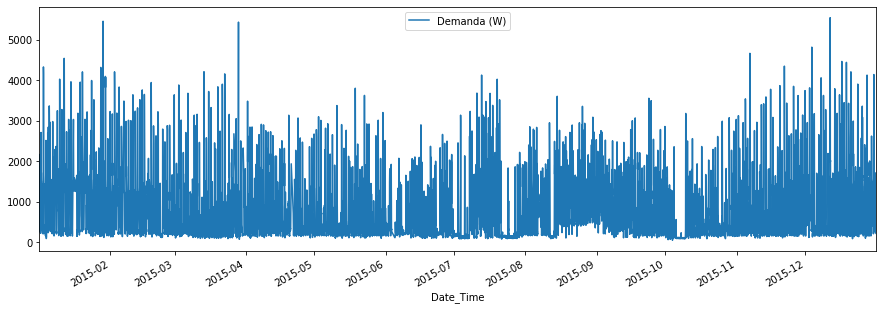

In [11]:
cols = df_demanda.columns.drop(['Date_Time', 'Hour', 'Day'])
df_demanda[cols] = df_demanda[cols].apply(pd.to_numeric)

for i in range(len(cols)):
    df_demanda.plot(x='Date_Time', y=df_demanda[cols].columns[[i]], figsize=(15,5))

## Predictions

In [12]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as MSE, r2_score
from pandas import DataFrame, concat
from numpy import concatenate
from sklearn.utils import shuffle
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras.callbacks import EarlyStopping
import xgboost as xgb

Using TensorFlow backend.


<hr>

### Transform

<ul>
    <li> A dataset with 8 features and a target is taken.
    <li> All columns are scaled and shifted according to the <code>series_to_supervised()</code> function. The shifted target column will also be a feature!
    <li> The shifted dataframe, <i>lagged</i>, thus contains (n_hours*9 + 8) columns, all of which are features.
    <li> This dataframe is concatenated to the target.
</ul>
<hr>

In [13]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = [], []
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg


# values = df_demanda.drop(['Date_Time', 'Day'], axis=1).values
values = df_demanda[['Temperature', 'Demanda (W)']].values

n_features = values.shape[1]
n_hours = 3
n_out = 1

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# specify the number of lag hours
# frame as supervised learning
lagged = series_to_supervised(scaled[:, :], n_hours, n_out, True)  # .reset_index(drop=True)

reframed = pd.concat([lagged.iloc[:, :-1], pd.Series(scaled[:, -1], name='Demanda')], axis=1).dropna()
reframed.head()

print(reframed.shape)
reframed.head(10)

(8227, 8)


,var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var1(t),Demanda
3,0.115385,0.039287,0.081585,0.047654,0.081585,0.165151,0.058275,0.250637
4,0.081585,0.047654,0.081585,0.165151,0.058275,0.250637,0.066434,0.245726
5,0.081585,0.165151,0.058275,0.250637,0.066434,0.245726,0.058275,0.239724
6,0.058275,0.250637,0.066434,0.245726,0.058275,0.239724,0.068765,0.242270
7,0.066434,0.245726,0.058275,0.239724,0.068765,0.242270,0.068765,0.272645
8,0.058275,0.239724,0.068765,0.242270,0.068765,0.272645,0.079254,0.385959
9,0.068765,0.242270,0.068765,0.272645,0.079254,0.385959,0.123543,0.182066
10,0.068765,0.272645,0.079254,0.385959,0.123543,0.182066,0.268065,0.292834
11,0.079254,0.385959,0.123543,0.182066,0.268065,0.292834,0.389277,0.267370
12,0.123543,0.182066,0.268065,0.292834,0.389277,0.267370,0.351981,0.223354


<hr>
<ul>
    <li> We take 2/3 of the dataset for training.
    <li> X_train and _test sets contain only lagged data --- no var(t).
</ul>
<hr>

In [14]:
shuffled_vals = True

# shuffle data
idx = np.arange(reframed.shape[0])
np.random.shuffle(idx)

# split into train and test sets
if shuffled_vals:
    values = reframed.values[idx]
else: values = reframed.values
    
n_train_hours = int(reframed.shape[0] * 0.8) #(2/3))
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

n_obs = n_hours * n_features

# split into input and outputs
X_train, y_train = train[:, :n_obs], train[:, -1]
X_test, y_test = test[:, :n_obs], test[:, -1]
print(X_train.shape, y_train.shape)

# reshape input to be 3D [samples, timesteps, features]
X_train_in = X_train.reshape((X_train.shape[0], n_hours, n_features))#X_train.shape[1]))
X_test_in = X_test.reshape((X_test.shape[0], n_hours, n_features))#X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(6581, 6) (6581,)
(6581, 6) (6581,) (1646, 6) (1646,)


<hr>

### LSTM Net

<hr>

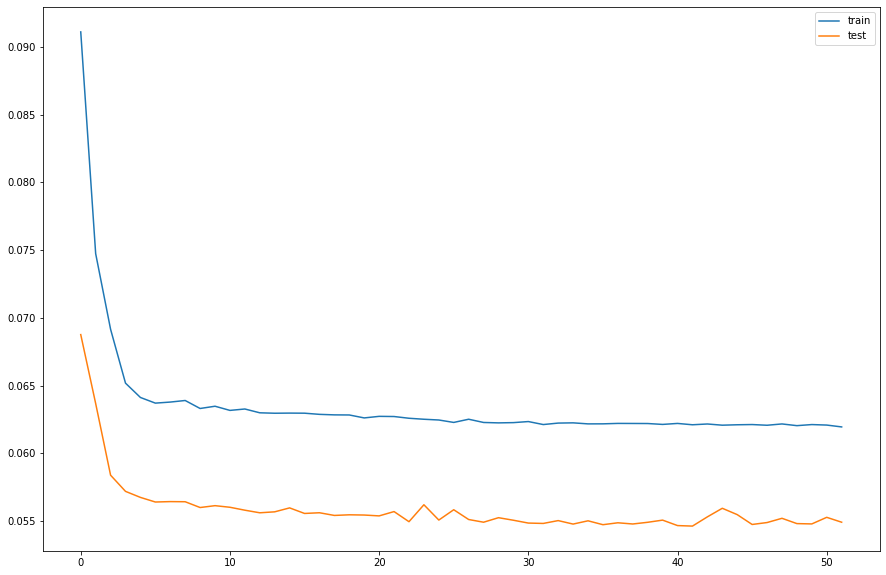

In [15]:
def fit_network(n_neurons=50, n_outputs=n_out,
                optimizer='adam', batch_size=72, epochs=100, verbosity=2, shuffled=False):
    
    # design network
    model = Sequential()
    model.add(LSTM(n_neurons, input_shape=(X_train_in.shape[1], X_train_in.shape[2])))
    model.add(Dense(n_outputs))
    model.compile(loss='mae', optimizer=optimizer)

    # Run network
    history = model.fit(X_train_in, y_train, epochs=100, batch_size=batch_size, 
                        callbacks=[EarlyStopping(monitor='val_loss', patience=10)],
                        #validation_split=0.1, 
                        validation_data=(X_test_in, y_test),
                        verbose=verbosity, shuffle=shuffled)

    '''history = model.fit(X_train_in, y_train, batch_size=64, epochs=100,
                        callbacks=[EarlyStopping(monitor='val_loss', patience=10)],
                        verbose=1, validation_split=0.1, shuffle=True)'''
    
    return (model, history)

model, history = fit_network(shuffled=True, verbosity=0)

# plot history
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

<hr>
y_pred_out and y_test are concatenated to a full set of features---var(t-1) in this case---in order to perform the inverse scaling only.
<hr>

Test RMSE: 517.176
Model accuracy: 0.502
Model Mean Directional accuracy: 0.771


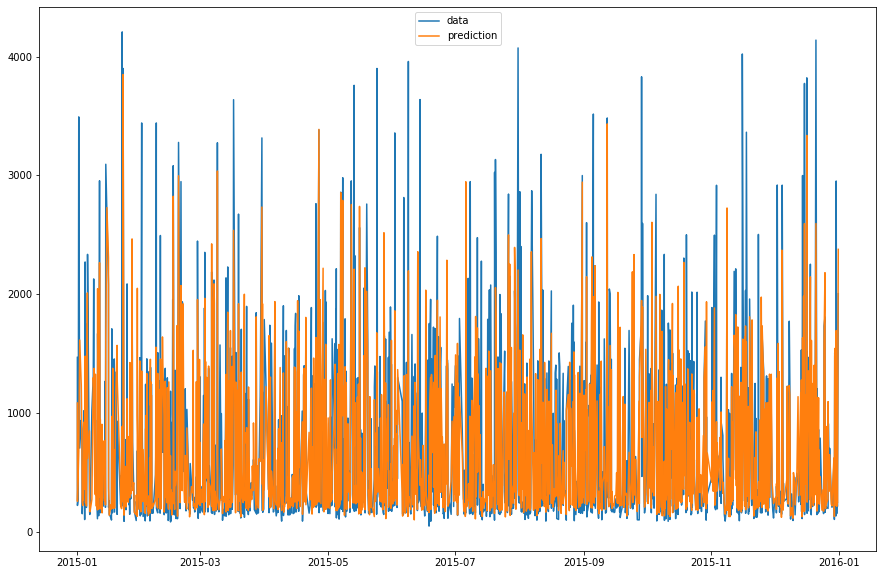

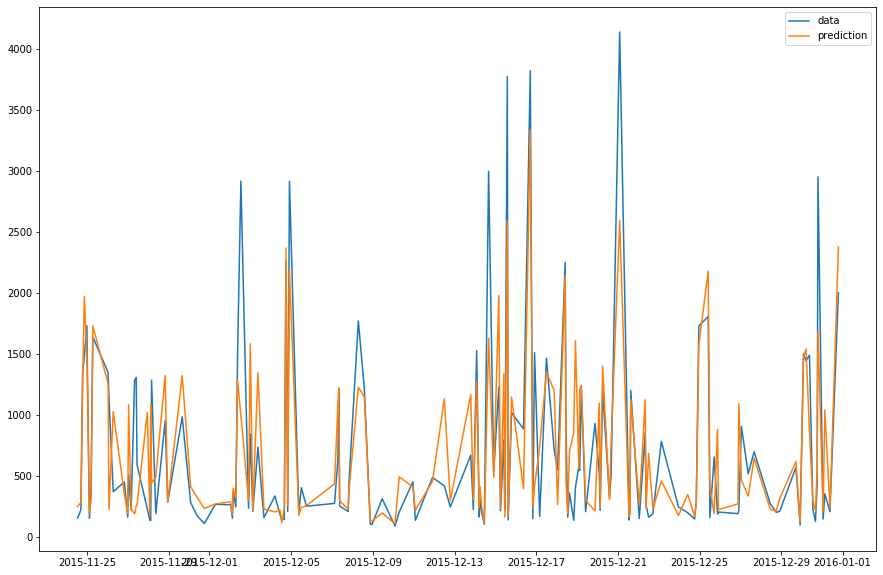

In [16]:
y_pred_out = model.predict(X_test_in)

# invert scaling for forecast
y_pred = concatenate((X_test[:, -n_features:-1], y_pred_out), axis=1)
# _=pd.DataFrame(inv_yhat)
# _.tail()
y_pred = scaler.inverse_transform(y_pred)[:, -1]

# invert scaling for actual
y_test = y_test.reshape(y_test.shape[0], 1)
y_inv = concatenate((X_test[:, -n_features:-1], y_test), axis=1)
y_inv = scaler.inverse_transform(y_inv)[:, -1]

# calculate RMSE
from math import sqrt

rmse = sqrt(MSE(y_inv, y_pred))
print('Test RMSE: %.3f' % rmse)
LSTM_accuracy = r2_score(y_inv, y_pred)
print('Model accuracy: {:.3f}'.format(LSTM_accuracy))


def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) 
                    == np.sign(predicted[1:] - predicted[:-1])).astype(int))

print('Model Mean Directional accuracy: {:.3f}'.format(mda(y_inv, y_pred)))

'''# plot history
plt.figure(figsize=(15, 10))
plt.plot(df_demanda.Date_Time.iloc[-y_pred.shape[0]:], y_inv, label='data')
plt.plot(df_demanda.Date_Time.iloc[-y_pred.shape[0]:], y_pred, label='prediction')
plt.legend()
# plt.savefig('predvsdata.pdf')
plt.show()'''

# plot prediction

hours_df = df_demanda.Date_Time[idx].iloc[n_train_hours:].sort_values()

plt.figure(figsize=(15, 10))
plt.plot(hours_df, y_inv, label='data')
plt.plot(hours_df, y_pred, label='prediction')
plt.legend()
# plt.savefig('predvsdata.pdf')

plt.figure(figsize=(15, 10))
plt.plot(hours_df[-150:], y_inv[-150:], label='data')
plt.plot(hours_df[-150:], y_pred[-150:], label='prediction')
plt.legend()
plt.show()

In [17]:
def lstm_net(X_train_in, y_train, X_test_in, y_test, X_test):
    
    model, history = fit_network(verbosity=0, shuffled=True)
    y_pred_out = model.predict(X_test_in)

    # invert scaling for forecast
    y_pred = concatenate((X_test[:, -n_features:-1], y_pred_out), axis=1)
    y_pred = scaler.inverse_transform(y_pred)[:, -1]

    # invert scaling for actual
    y_test = y_test.reshape(y_test.shape[0], 1)
    y_inv = concatenate((X_test[:, -n_features:-1], y_test), axis=1)
    y_inv = scaler.inverse_transform(y_inv)[:, -1]

    # calculate RMSE
    from math import sqrt

    rmse = sqrt(MSE(y_inv, y_pred))
    LSTM_accuracy = r2_score(y_inv, y_pred)
    mean_da = mda(y_inv, y_pred)
    
    return (rmse, y_inv, y_pred, LSTM_accuracy, mean_da)

import time
from tqdm import tqdm
    
rmse_l, y_inv_l, y_pred_l, acc_l, mda_l = [], [], [], [], []
for i in tqdm(range(31)):
    tqdm._instances.clear()
    rmse, y_inv, y_pred, acc, mdacc = lstm_net(X_train_in, y_train, X_test_in, y_test, X_test)
    # print(rmse)
    rmse_l.append(rmse)
    y_inv_l.append(y_inv)
    y_pred_l.append(y_pred)
    acc_l.append(acc)
    mda_l.append(mdacc)

100%|██████████| 31/31 [08:28<00:00, 16.42s/it]


In [18]:
# getting the index of the median rmse value
rsme_df = pd.DataFrame(rmse_l)
rsme_med = pd.DataFrame(rmse_l).median().values[0]
ind_med = rsme_df[rsme_df[0]==rsme_med].index.tolist()[0]
y_pred_lstm = y_pred_l[ind_med]

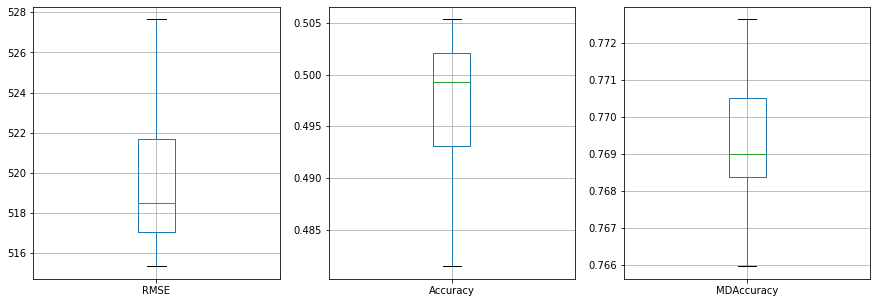

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
pd.DataFrame(rmse_l, columns=['RMSE']).boxplot(figsize=(7,6), ax=ax[0])
pd.DataFrame(acc_l, columns=['Accuracy']).boxplot(figsize=(7,6), ax=ax[1])
pd.DataFrame(mda_l, columns=['MDAccuracy']).boxplot(figsize=(7,6), ax=ax[2])
# plt.savefig('RMSE.pdf')

## XGBOOST

In [50]:
values = df_demanda.drop(['Date_Time', 'Day'], axis=1).values
#values = df_demanda[['Temperature', 'Demanda (W)']].values

n_features = values.shape[1]
n_hours = 1
n_out = 1

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# specify the number of lag hours
# frame as supervised learning
lagged = series_to_supervised(scaled[:, :], n_hours, n_out, True)  # .reset_index(drop=True)

reframed = pd.concat([lagged.iloc[:, :-1], pd.Series(scaled[:, -1], name='Demanda')], axis=1).dropna()
reframed.head()

print(reframed.shape)
print(reframed.head(10))

shuffled_vals = False

# shuffle data
idx = np.arange(reframed.shape[0])
np.random.shuffle(idx)

# split into train and test sets
if shuffled_vals:
    values = reframed.values[idx]
else: values = reframed.values
    
n_train_hours = int(reframed.shape[0] * 0.8) #(2/3))
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

n_obs = n_hours * n_features

# split into input and outputs
X_train, y_train = train[:, :n_obs], train[:, -1]
X_test, y_test = test[:, :n_obs], test[:, -1]
print(X_train.shape, y_train.shape)

# reshape input to be 3D [samples, timesteps, features]
X_train_in = X_train.reshape((X_train.shape[0], n_hours, n_features))#X_train.shape[1]))
X_test_in = X_test.reshape((X_test.shape[0], n_hours, n_features))#X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8229, 20)
    var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1    0.115385   0.310867   0.717172   0.000000   0.072368   0.496552   
2    0.081585   0.290234   0.757576   0.000000   0.052632   0.503448   
3    0.081585   0.298487   0.777778   0.000000   0.072368   0.510345   
4    0.058275   0.272352   0.777778   0.000000   0.052632   0.524138   
5    0.066434   0.290234   0.797980   0.000000   0.023026   0.531034   
6    0.058275   0.288858   0.818182   0.038251   0.072368   0.544828   
7    0.068765   0.338377   0.919192   0.120219   0.177632   0.558621   
8    0.068765   0.367263   1.000000   0.000000   0.052632   0.572414   
9    0.079254   0.379642   1.000000   0.038251   0.101974   0.579310   
10   0.123543   0.430536   1.000000   0.120219   0.125000   0.600000   

    var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)   var1(t)   var2(t)   var3(t)  \
1         0.0        0.0   0.043478    0.039287  0.081585  0.290234  0.757576   
2         0.0        0.0   0.08695

In [52]:
def xgb_reg(X_train, y_train, X_test, y_test):

    import xgboost as xgb
    from sklearn.model_selection import GridSearchCV

    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.8, learning_rate = 0.1,
                    max_depth = 20, alpha = 10, n_estimators = 100)

    xg_reg.fit(X_train, y_train, eval_metric="mae", eval_set=[(X_train, y_train), (X_test, y_test)], 
               verbose=False, early_stopping_rounds = 10)

    y_pred_xg = xg_reg.predict(X_test)
    
    '''# ====================================================
    dmatrix = xgb.DMatrix(data=X_train,label=y_train) 
    xg_param_grid = {'learning_rate': [0.1, 0.3, 0.5], 
                      'n_estimators': [50, 100, 200], 
                      'max_depth': [10, 20, 30],
                      'alpha': [0, 10],
                      'subsample': [0.3, 0.5, 0.9],
                      'colsample_bytree': [0.8,1]
                     } 
    
    xg = xgb.XGBRegressor(objective ='reg:squarederror')
    
    grid_rmse = GridSearchCV(estimator=xg, param_grid=xg_param_grid, 
                            scoring='neg_mean_squared_error', cv=4, verbose=1)
    
    grid_rmse.fit(X_train, y_train)
    
    y_pred_xg = grid_rmse.predict(X_test)
    # ===================================================='''

    from math import sqrt

    rmse = sqrt(MSE(y_test, y_pred_xg))
    accuracy = r2_score(y_test, y_pred_xg)
    mean_da = mda(y_test, y_pred_xg)
    
    '''print("Best parameters found: ", grid_rmse.best_params_) 
    print("Lowest RMSE found: ", np.sqrt(np.abs(grid_rmse.best_score_)))'''
    
    return (rmse, accuracy, mean_da, y_pred_xg)


rmse_xgb, acc_xgb, mda_xgb, y_pred_xgb = xgb_reg(X_train, y_train, X_test, y_test)
    
print('Test set RMSE of xg: {:.4f}'.format(rmse_xgb))
print('Test set score of xg: {:.4f}'.format(acc_xgb))
print('Model Mean Directional accuracy: {:.3f}'.format(mda_xgb))

# invert scaling for forecast
y_pred_xgb = concatenate((X_test[:, -n_features:-1], y_pred_xgb.reshape(y_pred_xgb.shape[0], 1)), axis=1)
y_pred_xgb = scaler.inverse_transform(y_pred_xgb)[:, -1]

Test set RMSE of xg: 0.1089
Test set score of xg: 0.5355
Model Mean Directional accuracy: 0.569


In [ ]:
{'alpha': 0, 'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50, 'subsample': 0.5}

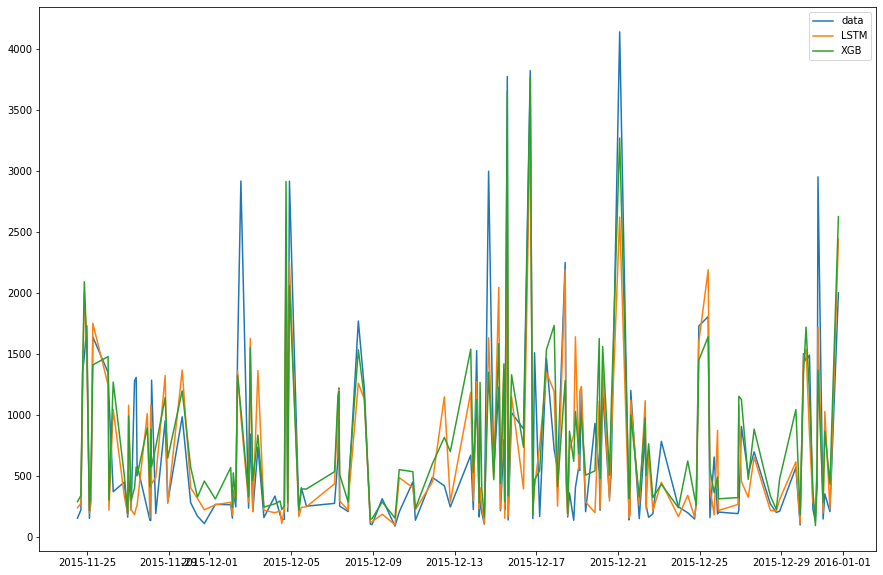

In [26]:
# plot history
plt.figure(figsize=(15, 10))
plt.plot(hours_df[-150:], y_inv[-150:], label='data')
plt.plot(hours_df[-150:], y_pred_lstm[-150:], label='LSTM')
plt.plot(hours_df[-150:], y_pred_xgb[-150:], label='XGB')
plt.legend()
# plt.savefig('predvsdata.pdf')
plt.show()